<a href="https://colab.research.google.com/github/Mirza-Ismail-Beg/Image-Analysis/blob/main/Color%20Detection/image_analysis_major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


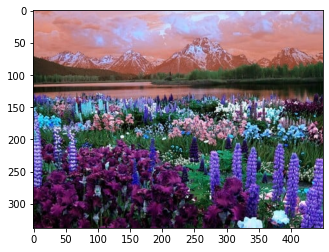

In [ ]:
imgName = 'landscape.jpg'
image = cv2.imread(imgName)
plt.imshow(image)

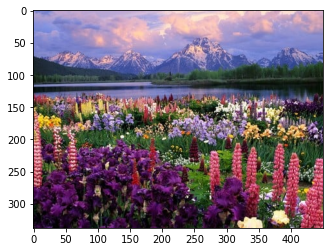

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([189.82696321, 134.22541091, 119.32318028]),
 array([82.00572067, 27.76831285, 75.15378771]),
 array([145.77211987, 140.5168024 , 197.70614902]),
 array([220.29016645, 185.55184931, 196.24922332]),
 array([147.55520386,  79.46046137,  78.85590129]),
 array([ 98.83220244,  91.33156382, 139.01233336]),
 array([63.59081234, 76.683085  , 56.69912381]),
 array([29.76327073, 25.2473378 , 27.34184834])]

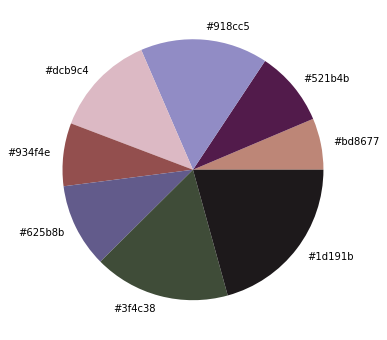

In [ ]:
get_colors(get_image(imgName), 8, True)